**Modulo 4 : Entrenamiento para Datos Tabulares**
* Instructor: [Juan Maniglia](https://juanmaniglia.github.io)

# Parte 4.4: Entrenamiento de Redes Neuronales

# Retropropagación clásica

La retropropagación es uno de los métodos más comunes para entrenar una red neuronal. Rumelhart, Hinton y Williams (1986) introdujeron la retropropagación y sigue siendo popular en la actualidad. Los programadores suelen entrenar redes neuronales profundas con retropropagación porque se escala muy bien cuando se ejecuta en unidades de procesamiento gráfico (GPU). Para comprender este algoritmo para redes neuronales, debemos examinar cómo entrenarlo y cómo procesa un patrón.

La retropropagación clásica se ha ampliado y modificado para dar lugar a muchos algoritmos de entrenamiento diferentes. En este capítulo, discutiremos los algoritmos de entrenamiento más utilizados para redes neuronales. Comenzamos con la retropropagación clásica y luego terminamos el capítulo con el descenso de gradiente estocástico (SGD).

La retropropagación es el medio principal por el cual se determinan los pesos de una red neuronal durante el entrenamiento. La retropropagación funciona calculando una cantidad de cambio de peso ($v_t$) para cada peso ($\theta$, theata) en la red neuronal. Este valor se resta de cada peso mediante la siguiente ecuación: 

$$ \theta_t = \theta_{t-1} - v_t $$

Este proceso se repite para cada iteración ($t$). Cómo se calcula el cambio de peso depende del algoritmo de entrenamiento. La retropropagación clásica simplemente calcula un gradiente ($\nabla$, nabla) para cada peso en la red neuronal con respecto a la función de error ($J$) de la red neuronal. El gradiente está escalado por una tasa de aprendizaje ($\eta$, eta).

$$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) $$

La tasa de aprendizaje es un concepto importante para el entrenamiento de retropropagación. Establecer la tasa de aprendizaje puede ser complejo:

* Una tasa de aprendizaje demasiado baja por lo general convergerá en una buena solución; sin embargo, el proceso será muy lento.
* Una tasa de aprendizaje demasiado alta fallará por completo o convergerá en un error mayor que una mejor tasa de aprendizaje.

Los valores comunes para la tasa de aprendizaje son: 0.1, 0.01, 0.001, etc.

La retropropagación es un tipo de descenso de gradiente y muchos textos usan estos dos términos indistintamente. El descenso de gradiente se refiere al cálculo de un gradiente en cada peso en la red neuronal para cada elemento de entrenamiento. Debido a que la red neuronal no generará el valor esperado para un elemento de entrenamiento, el gradiente de cada peso le dará una indicación sobre cómo modificar cada peso para lograr el resultado esperado. Si la red neuronal generara exactamente lo que se esperaba, el gradiente para cada peso sería 0, lo que indica que no es necesario cambiar el peso.

  El gradiente es la derivada de la función de error en el valor actual del peso. La función de error mide la distancia entre la salida de la red neuronal y la salida esperada. De hecho, podemos usar el descenso de gradiente, un proceso en el que el valor de gradiente de cada peso puede alcanzar valores aún más bajos de la función de error.
  
Con respecto a la función de error, el gradiente es esencialmente la derivada parcial de cada peso en la red neuronal. Cada peso tiene un gradiente que es la pendiente de la función de error. Un peso es una conexión entre dos neuronas. Calcular el gradiente de la función de error permite que el método de entrenamiento determine si debe aumentar o disminuir el peso. A su vez, esta determinación disminuirá el error de la red neuronal. El error es la diferencia entre la salida esperada y la salida real de la red neuronal. Muchos métodos de entrenamiento diferentes llamados algoritmos de entrenamiento de propagación utilizan gradientes. En todos ellos, el signo del gradiente le dice a la red neuronal la siguiente información:

* Gradiente cero: el peso no contribuye al error de la red neuronal.
* Gradiente negativo: se debe aumentar el peso para lograr un error menor.
* Gradiente positivo: se debe disminuir el peso para lograr un error menor.

Debido a que muchos algoritmos dependen del cálculo de gradientes, comenzaremos con un análisis de este proceso. En primer lugar, examinemos el gradiente. Esencialmente, el entrenamiento es una búsqueda del conjunto de pesos que hará que la red neuronal tenga el error más bajo para un conjunto de entrenamiento. Si tuviéramos una cantidad infinita de recursos de cálculo, simplemente probaríamos todas las combinaciones posibles de pesos para determinar cuál proporcionó el menor error durante el entrenamiento.

Debido a que no tenemos recursos informáticos ilimitados, tenemos que usar algún tipo de atajo para evitar la necesidad de examinar todas las combinaciones de pesos posibles. Estos métodos de entrenamiento utilizan técnicas inteligentes para evitar realizar una búsqueda de fuerza bruta de todos los valores de peso. Este tipo de búsqueda exhaustiva sería imposible porque incluso las redes pequeñas tienen un número infinito de combinaciones de peso.

Considere un gráfico que muestra el error de una red neuronal para cada peso posible. La Figura 4.DRV es un gráfico que demuestra el error para un solo peso:

**Figure 4.DRV: Derivative**
![Derivative](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_deriv.png "Derivative")

Mirando este gráfico, puede ver fácilmente que el peso óptimo es la ubicación donde la línea tiene el valor y más bajo. El problema es que solo vemos el error por el valor actual del peso; no vemos el gráfico completo porque ese proceso requeriría una búsqueda exhaustiva. Sin embargo, podemos determinar la pendiente de la curva de error con un peso particular. En el gráfico anterior, vemos la pendiente de la curva de error en 1,5. La línea recta que apenas toca la curva de error en 1,5 da la pendiente. En este caso, la pendiente o gradiente es -0,5622. La pendiente negativa indica que un aumento en el peso disminuirá el error.
El gradiente es la pendiente instantánea de la función de error en el peso especificado. La derivada de la curva de error en ese punto da el gradiente. Esta línea nos dice la pendiente de la función de error en el peso dado.
Las derivadas son uno de los conceptos más fundamentales del cálculo. Para los propósitos de este libro, solo necesitas entender que una derivada proporciona la pendiente de una función en un punto específico. Una técnica de entrenamiento y esta pendiente pueden darte la información para ajustar el peso para un error menor. Usando nuestra definición de trabajo del gradiente, ahora mostraremos cómo calcularlo.


### Retropropagación de impulso

Momentum agrega otro término al cálculo de $v_t$:

$$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) + \lambda v_{t-1} $$

Al igual que la tasa de aprendizaje, el impulso agrega otro parámetro de entrenamiento que escala el efecto del impulso. La retropropagación de impulso tiene dos parámetros de entrenamiento: tasa de aprendizaje ($\eta$, eta) e impulso ($\lambda$, lambda). Momentum simplemente agrega el valor escalado de la cantidad de cambio de peso anterior ($v_{t-1}$) a la cantidad de cambio de peso actual ($v_t$).

Esto tiene el efecto de agregar fuerza adicional detrás de una dirección en la que se movía un peso. La Figura 4.MTM muestra cómo esto podría permitir que el peso escape de un mínimo local.

**Figure 4.MTM: Momentum**
![Momentum](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_5_momentum.png "Momentum")

Un valor muy común para el impulso es 0,9.


### Propagación inversa por lotes y en línea

¿Con qué frecuencia se deben actualizar los pesos de una red neuronal? Los gradientes se pueden calcular para un elemento de conjunto de entrenamiento. Estos gradientes también se pueden sumar en lotes y los pesos se actualizan una vez por lote.

* **Entrenamiento en línea**: actualice los pesos en función de los gradientes calculados a partir de un solo elemento del conjunto de entrenamiento.
* **Entrenamiento por lotes**: actualice los pesos en función de la suma de los gradientes sobre todos los elementos del conjunto de entrenamiento.
* **Tamaño del lote**: actualice los pesos en función de la suma de algunos tamaños de lote de elementos del conjunto de entrenamiento.
* **Entrenamiento de mini lotes**: lo mismo que el tamaño de lote, pero con un tamaño de lote muy pequeño. Los mini lotes son muy populares y, a menudo, se encuentran en el rango de 32 a 64 elementos.

Debido a que el tamaño del lote es más pequeño que el tamaño del conjunto de entrenamiento completo, es posible que se necesiten varios lotes para completar el conjunto de entrenamiento.

* **Paso/Iteración**: la cantidad de lotes que se procesaron.
* **Época**: la cantidad de veces que se procesó el conjunto de entrenamiento completo.


# Descenso de gradiente estocástico

El descenso de gradiente tocástico (SGD) es actualmente uno de los algoritmos de entrenamiento de redes neuronales más populares. Funciona de manera muy similar al entrenamiento por lotes/mini lotes, excepto que los lotes se componen de un conjunto aleatorio de elementos de entrenamiento.

Esto conduce a una convergencia de errores muy irregulares durante el entrenamiento, como se muestra en la Figura 4.SGD.

**Figure 4.SGD: SGD Error**
![SGD Error](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_5_sgd_error.png "SGD Error")
[Image from Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

Debido a que la red neuronal se entrena en una muestra aleatoria del conjunto de entrenamiento completo cada vez, el error no hace una transición suave hacia abajo. Sin embargo, el error generalmente baja.

Las ventajas de SGD incluyen:

* Computacionalmente eficiente. Incluso con un conjunto de entrenamiento muy grande, cada paso de entrenamiento puede ser relativamente rápido.
* Disminuye el sobreajuste al centrarse solo en una parte del conjunto de entrenamiento en cada paso.


### Otras Técnicas

Un problema con los algoritmos de entrenamiento de retropropagación simple es que son muy sensibles a la velocidad de aprendizaje y al impulso. Esto es difícil porque:

* La tasa de aprendizaje debe ajustarse a un nivel lo suficientemente pequeño para entrenar una red neuronal precisa.
* El impulso debe ser lo suficientemente grande para superar los mínimos locales, pero lo suficientemente pequeño para no desestabilizar el entrenamiento.
* Una sola tasa/impulso de aprendizaje a menudo no es suficiente para todo el proceso de capacitación. A menudo es útil disminuir automáticamente la tasa de aprendizaje a medida que avanza el entrenamiento.
* Todos los pesos comparten una sola tasa/impulso de aprendizaje.

Otras técnicas de entrenamiento:

* **Propagación resiliente**: use solo la magnitud del gradiente y permita que cada neurona aprenda a su propio ritmo. No hay necesidad de tasa de aprendizaje/impulso; sin embargo, solo funciona en modo de lote completo.
* **Gradiente acelerado de Nesterov**: ayuda a mitigar el riesgo de elegir un minilote incorrecto.
* **Adagrad**: permite una tasa de aprendizaje por peso que decae automáticamente y un concepto de impulso.
* **Adadelta**: extensión de Adagrad que busca reducir su tasa de aprendizaje agresiva y monótonamente decreciente.
* **Métodos sin gradiente**: los métodos sin gradiente *a veces* pueden ser útiles, aunque rara vez superan a los métodos de retropropagación basados ​​en gradiente.

### Actualización de ADAM

ADAM es el primer algoritmo de entrenamiento que debes probar. es muy efectivo Kingma y Ba (2014) introdujeron la regla de actualización de Adam que deriva su nombre de las estimaciones de momento adaptativo que utiliza.  Adam estima primero (media) y segundo (varianza) para determinar las correcciones de peso. Adam comienza con un promedio exponencialmente decreciente de gradientes pasados (m):

$$ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t $$

Este promedio logra un objetivo similar a la actualización de impulso clásica; sin embargo, su valor se calcula automáticamente en función del gradiente actual ($g_t$). La regla de actualización luego calcula el segundo momento ($v_t$):

$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 $$

Los valores $m_t$ y $v_t$ son estimaciones del primer momento (la media) y el segundo momento (la varianza no centrada) de los gradientes respectivamente. Sin embargo, tendrán un fuerte sesgo hacia el cero en los ciclos formativos iniciales. El sesgo del primer momento se corrige de la siguiente manera.

$$ \hat{m}_t = \frac{m_t}{1-\beta^t_1} $$

Del mismo modo, también se corrige el segundo momento:

$$ \hat{v}_t = \frac{v_t}{1-\beta_2^t} $$

Estas estimaciones del primer y segundo momento con corrección de sesgo se aplican a la regla de actualización de Adam final, de la siguiente manera:

$$ \theta_t = \theta_{t-1} - \frac{\alpha \cdot \hat{m}_t}{\sqrt{\hat{v}_t}+\eta} \hat{m}_t $$

Adam es muy tolerante a la tasa de aprendizaje inicial (\alpha) y otros parámetros de entrenamiento. Kingma y Ba (2014) proponen valores predeterminados de 0,9 para $\beta_1$, 0,999 para $\beta_2$ y 10-8 para $\eta$.

### Métodos comparados

La siguiente imagen muestra cómo se entrena cada uno de estos algoritmos (image credits: [author](Alec Radford), [where I found it](http://sebastianruder.com/optimizing-gradient-descent/index.html#visualizationofalgorithms) ):

![Training Techniques](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/contours_evaluation_optimizers.gif "Training Techniques")



### Especificando la regla de actualización en Tensorflow

TensorFlow permite que la regla de actualización se establezca en una de las siguientes:

* Adagrad
* **Adam**
* Ftrl
* Momentum
* RMSProp
* **SGD**



Restoring model weights from the end of the best epoch: 144.
Epoch 00149: early stopping


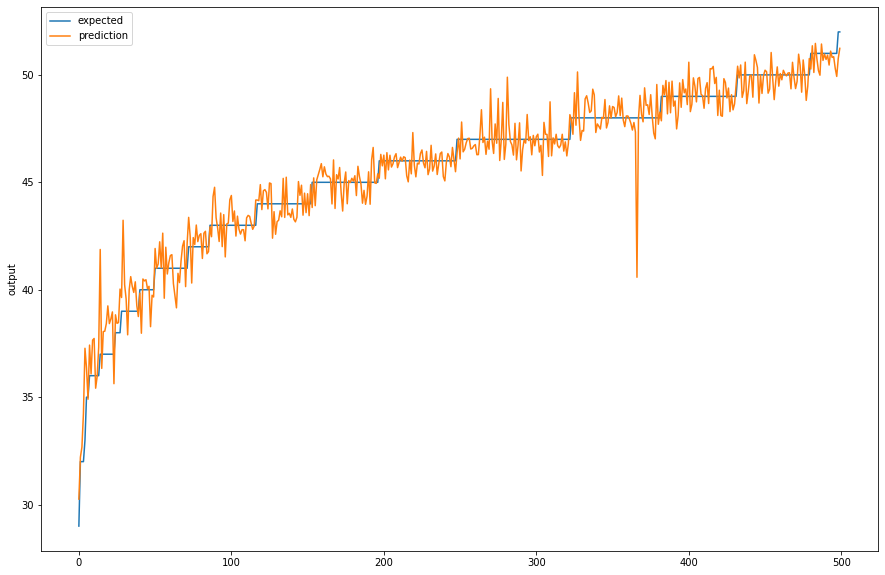

In [6]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


# Gráfico de Regresión 
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.figure(figsize=(15, 10))
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Leer el dataset
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

# Generar dummies para 'job'
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generar dummies para 'area'
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generar dummies para 'product'
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Tratar Missing values en income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standarizar rangos
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convertir a numpy - Clasificación
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Crear train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

# Construir la red neural
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Oculta 1
model.add(Dense(10, activation='relu')) # Oculta 2
model.add(Dense(1)) # Salida
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=0,epochs=1000)

# Gráfico
pred = model.predict(x_test)
chart_regression(pred.flatten(),y_test)